<a href="https://colab.research.google.com/github/dhruvingandhi11/gandhidhruvin/blob/master/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To explore unsupervised Machine **Learning** bold text

In [46]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
dataset = pd.read_csv('/content/Iris.csv')

In [48]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
dataset = dataset.drop('Species', axis = 1)
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [51]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [52]:
dataset.shape

(150, 5)

In [53]:
dataset = dataset.drop('Id',axis =1)
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<function matplotlib.pyplot.show>

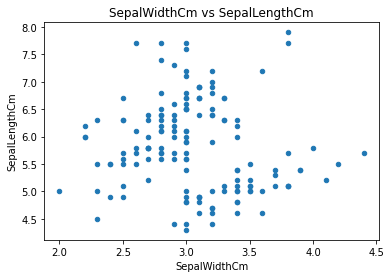

In [54]:
dataset.plot(kind = 'scatter',x='SepalWidthCm',y='SepalLengthCm',title = 'SepalWidthCm vs SepalLengthCm')
plt.show

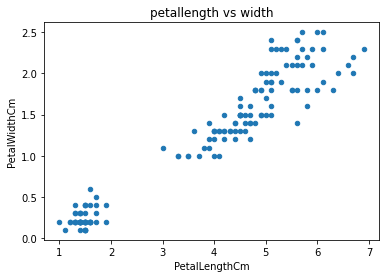

In [55]:
dataset.plot(kind= 'scatter', x='PetalLengthCm', y='PetalWidthCm', title = 'petallength vs width')
#dataset.plot(kind = 'scatter',x='PetalLengthCm',y='PetalWidthCm',title = 'PetalLength Cm vs PetalWidthCm')

In [56]:
x = dataset.iloc[:, [0, 1, 2, 3]].values




In [57]:
from sklearn.cluster import KMeans
wcss =[]

for i in range(1,11):
  kmeans= KMeans(n_clusters=i)
  kmeans.fit(x)

  wcss.append(kmeans.inertia_)

wcss  

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.53558205128205,
 38.930963049671746,
 34.51155576776165,
 29.88917890442891,
 28.146700549450554,
 26.12181818181818]

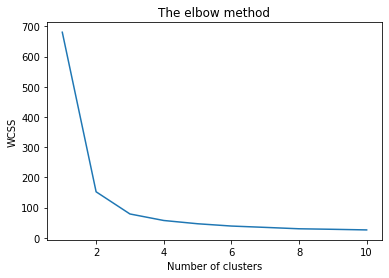

In [58]:
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [59]:
#fit data to standardscaler
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x)

In [60]:
#implementation of k means
km = KMeans(n_clusters=3, max_iter=100)
km.fit(X_std)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

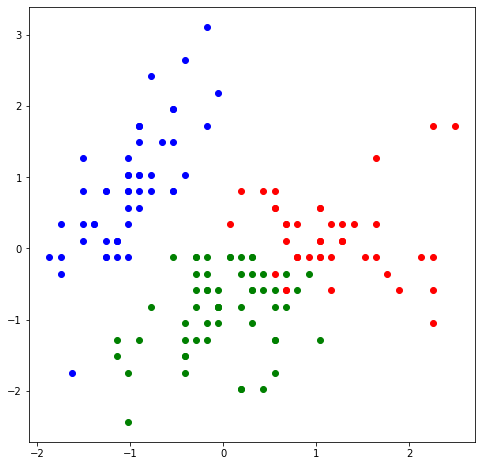

In [61]:
#plotting the custered daata

fig, ax = plt.subplots(figsize=(8, 8))

plt.scatter(X_std[km.labels_ == 0,0], X_std[km.labels_ == 0,1],
            c = 'green', label='cluster 1')

plt.scatter(X_std[km.labels_ == 1,0], X_std[km.labels_ == 1,1],
            c = 'blue', label='cluster 2')

plt.scatter(X_std[km.labels_ == 2,0], X_std[km.labels_ == 2,1],
            c = 'red', label='cluster 3')
#plt.figure(figsize=(10,10))

In [62]:
dataset = dataset.values
clust = km.fit_predict(dataset)

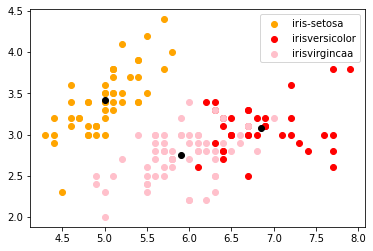

In [65]:
# Visualising the clusters on the Sepals
plt.scatter(dataset[clust == 0,0], dataset[clust == 0,1], c= 'orange', label = 'iris-setosa')
plt.scatter(dataset[clust == 1,0], dataset[clust == 1,1], c= 'red', label = 'irisversicolor')
plt.scatter(dataset[clust == 2,0], dataset[clust == 2,1], c= 'pink', label = 'irisvirgincaa')


plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],c = 'black')
plt.legend()

In [68]:
clust

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

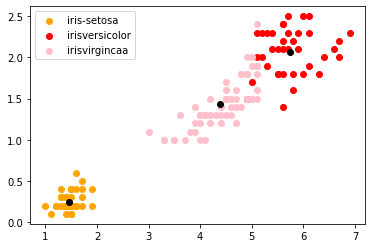

In [69]:
# Visualising the clusters on the Petals
plt.scatter(dataset[clust == 0,2], dataset[clust == 0,3], c= 'orange', label = 'iris-setosa')
plt.scatter(dataset[clust == 1,2], dataset[clust == 1,3], c= 'red', label = 'irisversicolor')
plt.scatter(dataset[clust == 2,2], dataset[clust == 2,3], c= 'pink', label = 'irisvirgincaa')


plt.scatter(km.cluster_centers_[:,2], km.cluster_centers_[:,3],c = 'black')
plt.legend()